<a href="https://colab.research.google.com/github/RuslanAvtobot/IT_volonteer/blob/main/user_reactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np

from tqdm import tqdm

tqdm.pandas()

In [44]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
df = pd.read_csv('/content/drive/MyDrive/Хакатон_IT_Volonteer/data/data_marked.csv')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1762 non-null   int64 
 1   date            1762 non-null   object
 2   username        1762 non-null   object
 3   tweet           1762 non-null   object
 4   replies_count   1762 non-null   int64 
 5   retweets_count  1762 non-null   int64 
 6   likes_count     1762 non-null   int64 
 7   hashtags        1762 non-null   object
 8   fond_name       1762 non-null   object
 9   rating          1762 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 137.8+ KB


In [47]:
df.sample(4)

,id,date,username,tweet,replies_count,retweets_count,likes_count,hashtags,fond_name,rating
1220,986529529391865856,2018-04-18,ust_labinsk,Обращение: Дорогие друзья! Обращаемся к вам з...,0,0,0,[],"""Вольное дело""",2
587,669023693524307968,2015-11-24,uralfondnb,#ЕжедневныеРазмышления ТОЛЬКО СЕГОДНЯ: Я буд...,0,0,0,"['ежедневныеразмышления', 'химическаязависимос...","""Наше будущее""",1
922,698851870723407872,2016-02-14,soilmsu,"По доброй традиции фонд ""Вольное дело"" Олега Д...",0,0,0,[],"""Вольное дело""",1
622,1240381495581310976,2020-03-18,shinodualist,"Курсы валюты и нефти пробивают все, что только...",0,0,0,[],"""Наше будущее""",0


In [48]:
vc = {0: 'Отрицательный твит', 1: 'Нейтральный твит', 2: 'Положительный твит'}

In [49]:
df['twet_context'] = df['rating'].map(vc)

In [50]:
df.sample(4)

,id,date,username,tweet,replies_count,retweets_count,likes_count,hashtags,fond_name,rating,twet_context
890,1450943065196305920,2021-10-20,bitcoin_btc_new,ETF Vaneck Bitcoin Futures получил зеленый све...,0,0,0,[],"""Свет""",1,Нейтральный твит
1252,1092860452684685056,2019-02-05,fondtimchenko,"Уважаемые коллеги, благополучатели, подписчики...",0,0,3,[],Фонд Тимченко,1,Нейтральный твит
97,1432911260220367104,2021-09-01,scalettamarcus,Нахуя брать в фонд книги про шахматы и какой-т...,0,0,1,[],"""Дар""",0,Отрицательный твит
491,1119847933954932992,2019-04-21,fondnoosfera,Фонд «Ноосфера» вошёл в рейтинг 20 лучших благ...,0,0,0,[],"""Ноосфера""",2,Положительный твит


In [51]:
df_user_react = df.groupby(['fond_name', 'twet_context'], as_index=False)['likes_count', 'retweets_count','replies_count'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [52]:
df_user_react.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fond_name       53 non-null     object 
 1   twet_context    53 non-null     object 
 2   likes_count     53 non-null     float64
 3   retweets_count  53 non-null     float64
 4   replies_count   53 non-null     float64
dtypes: float64(3), object(2)
memory usage: 2.2+ KB


In [53]:
df_user_react.index = df_user_react['twet_context']

In [54]:
df_user_react.sample(3)

,fond_name,twet_context,likes_count,retweets_count,replies_count
twet_context,,,,,
Положительный твит,"""Дар""",Положительный твит,7.45,1.5,0.70
Нейтральный твит,"""Агат""",Нейтральный твит,0.00,0.0,0.00
Нейтральный твит,Фонд Потанина,Нейтральный твит,1.10,0.2,0.05


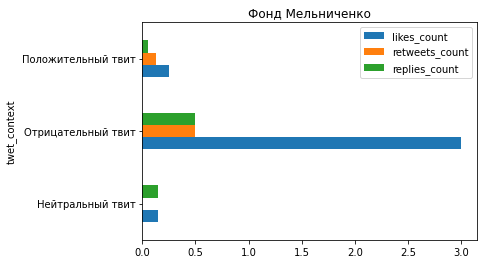

In [55]:
df_user_react[df_user_react['fond_name'] == 'Фонд Мельниченко'].plot(kind = 'barh', title = 'Фонд Мельниченко')

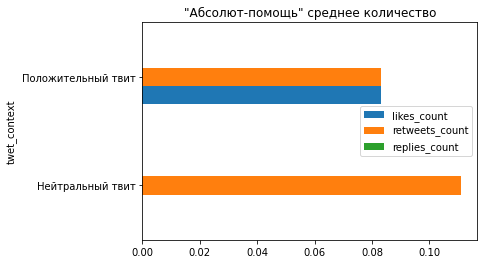

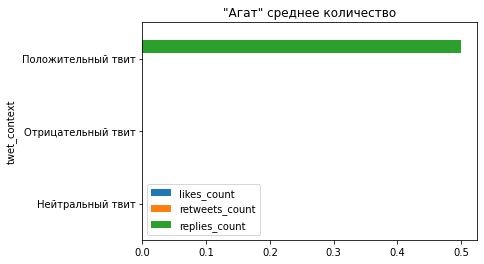

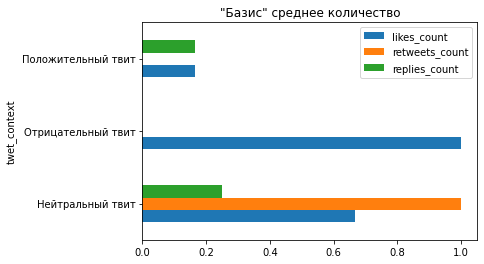

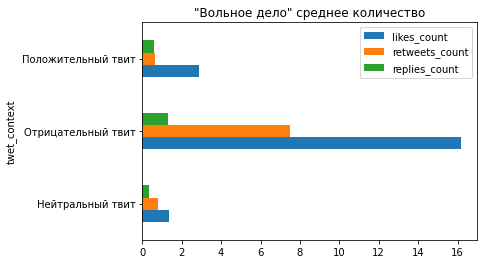

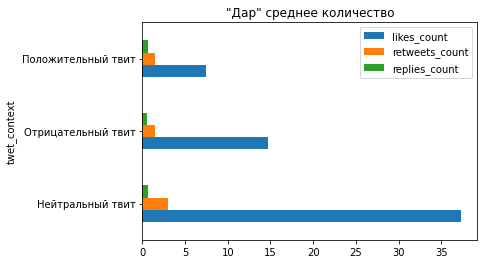

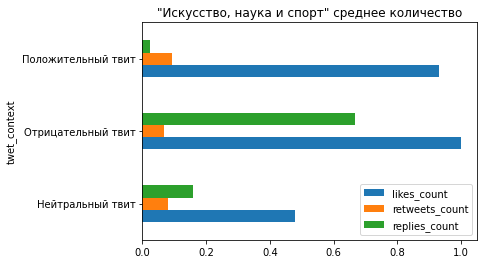

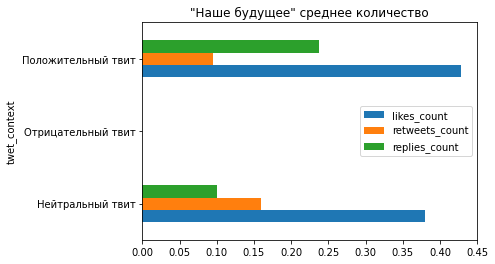

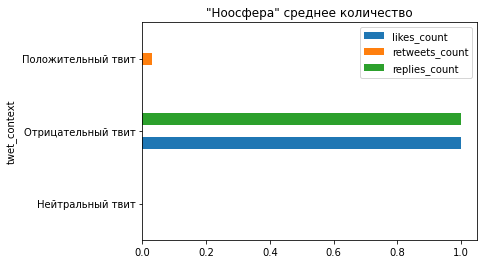

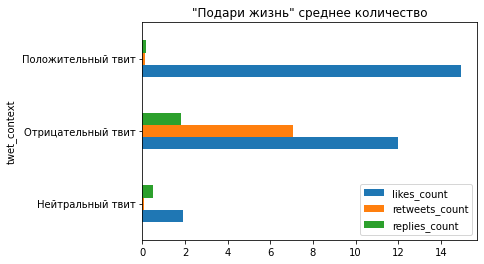

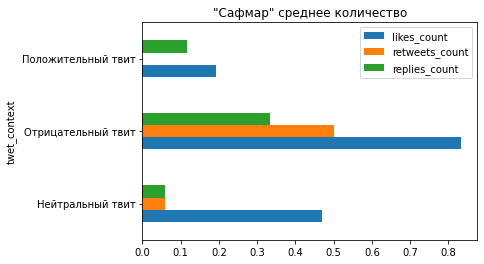

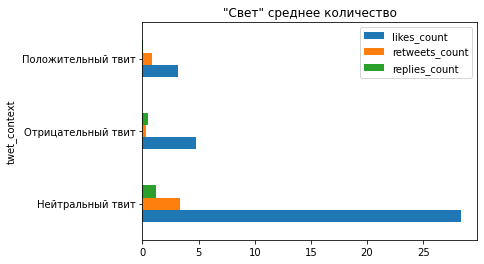

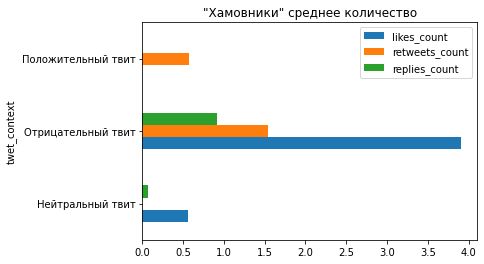

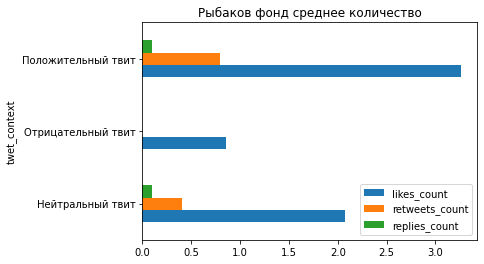

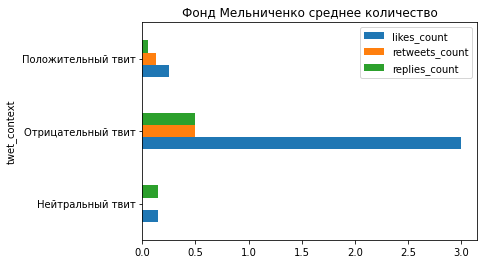

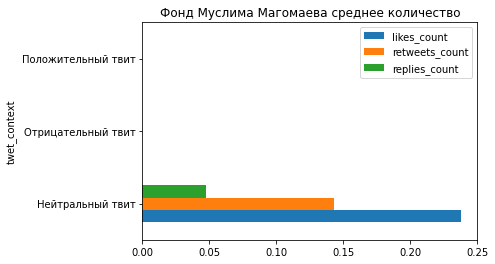

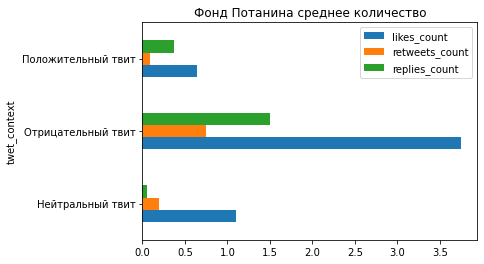

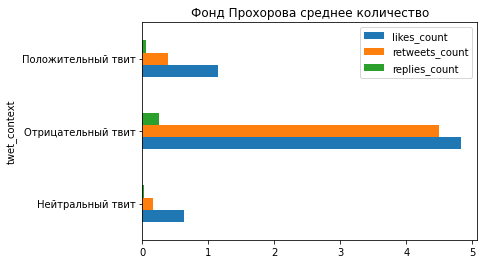

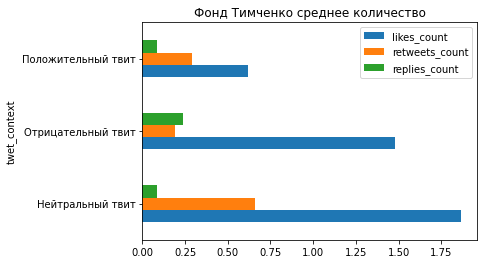

In [58]:
for i in df_user_react['fond_name'].unique():
  df_user_react[df_user_react['fond_name'] == i].plot(kind = 'barh', title = i + ' среднее количество')

In [59]:
df_user_react_max = df.groupby(['fond_name', 'twet_context'], as_index=False)['likes_count', 'retweets_count','replies_count'].max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [60]:
df_user_react_max.index = df_user_react_max['twet_context']

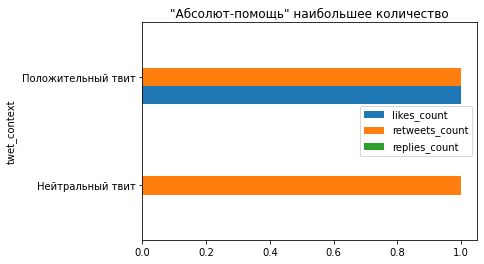

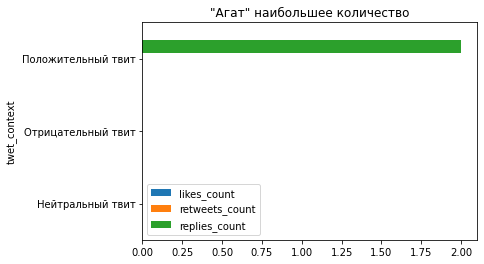

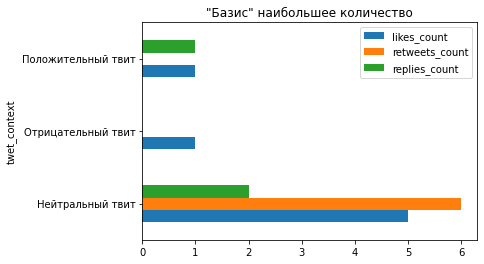

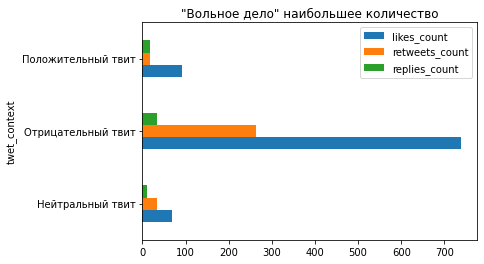

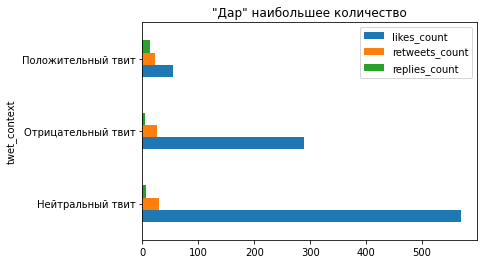

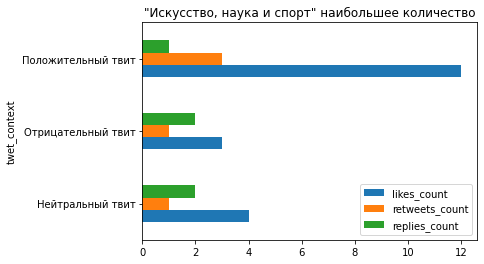

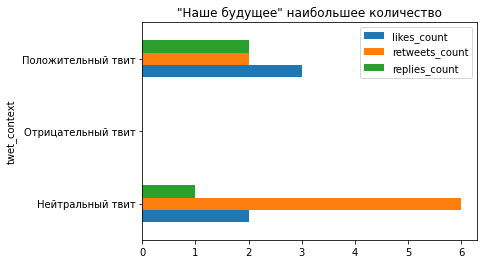

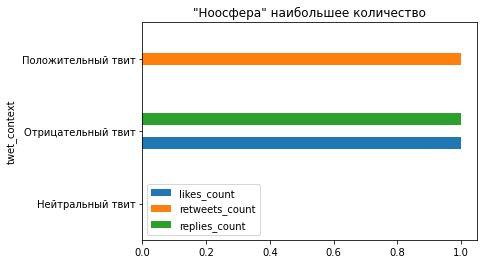

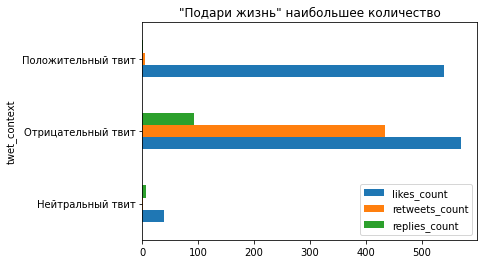

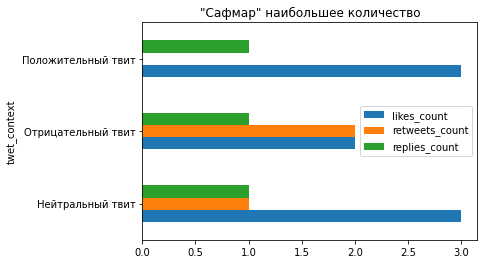

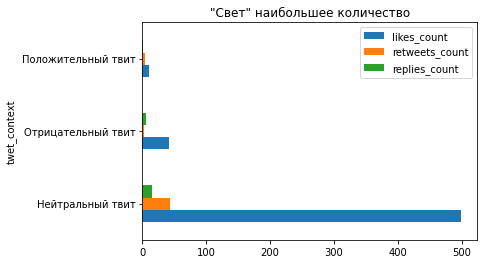

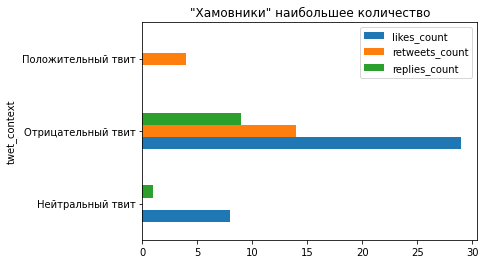

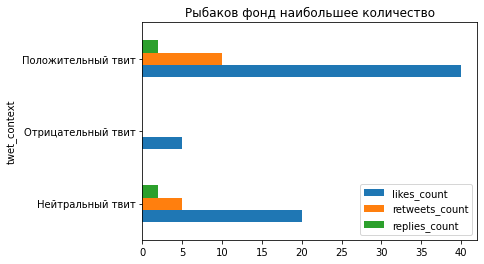

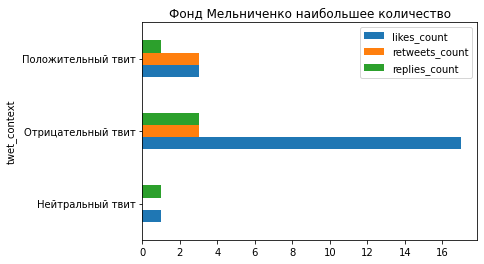

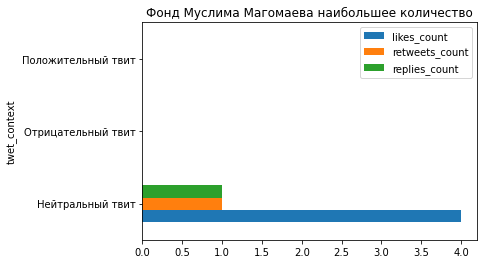

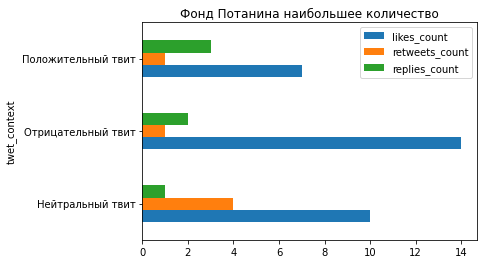

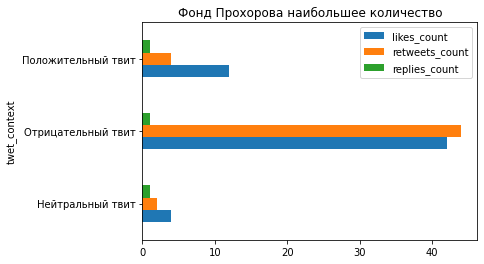

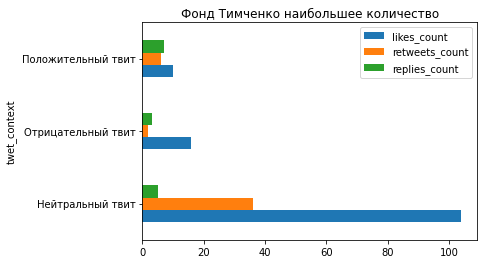

In [61]:
for i in df_user_react_max['fond_name'].unique():
  df_user_react_max[df_user_react_max['fond_name'] == i].plot(kind = 'barh', title = i + ' наибольшее количество')